In [ ]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

fs=8000 # Hz
ts = 1/fs
N = 8
n = np.arange(0,N,1)

x = np.sin(2*np.pi*1000*n*ts) + 0.2*np.sin(2*np.pi*2000*n*ts + 3*np.pi/8)


m=np.arange(0,N)
f = m*fs/N # Calculate the frequency
X=np.fft.fft(x,N) # Take the DFT

fig, ax = plt.subplots(2, 1, figsize=[10, 7])
# For signal
line0, =ax[0].plot(n,x,'--.')
ax[0].set_xlabel('Tid (n)')
ax[0].set_ylabel('Amplitude')
ax[0].set_ylim([-1.5,1.5])

# For DFT
line1, =ax[1].plot(f,np.abs(X),'--o',markerfacecolor='red')
ax[1].set_xlabel('Frekvens (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()


plt.show()




# Funksjon for å oppdatere figuren


def update(fs=11000,N=64,window='None'):
    ts = 1/fs
    n = np.arange(0,N,1)
    
    
    if window == 'None':
        w = np.ones(N)
    elif window == 'triangular':
        w = signal.triang(N)
    elif window == 'hanning':
        w = np.hanning(N)
    
    x = np.sin(2*np.pi*1000*n*ts) + 0.2*np.sin(2*np.pi*2000*n*ts) # Calulate the new digital signal
    m=np.arange(0,N)
    f = m*fs/N # Calulate the frequencies for the axis
    sig = w*x # Use the window
    X = np.fft.fft(sig,N) # Do the DFT of the windowed function
    
    # Update the function data
    line0.set_ydata(sig) 
    line0.set_xdata(n)
    ax[0].set_xlim([0, N])
    
    # Update the DFT data
    line1.set_ydata(np.abs(X))
    line1.set_xdata(f)
    ax[1].set_xlim([0, np.max(f)/2])
    ax[1].set_ylim([0, np.max(np.abs(X))*1.1])

    fig.canvas.draw_idle()


# Lag en interaktiv figur
i = interact(update, fs=(8000,30000, 100), N=(8,1024,1),window = ['None','hanning','triangular'])



### Hanning window
The hanning window 
$$w[n]=0.5-0.5\cos \left( \frac{2\pi n}{N} \right) \qquad\text{ for }n=0,1,2\ldots N-1$$

for $N=17$

<IPython.core.display.Javascript object>


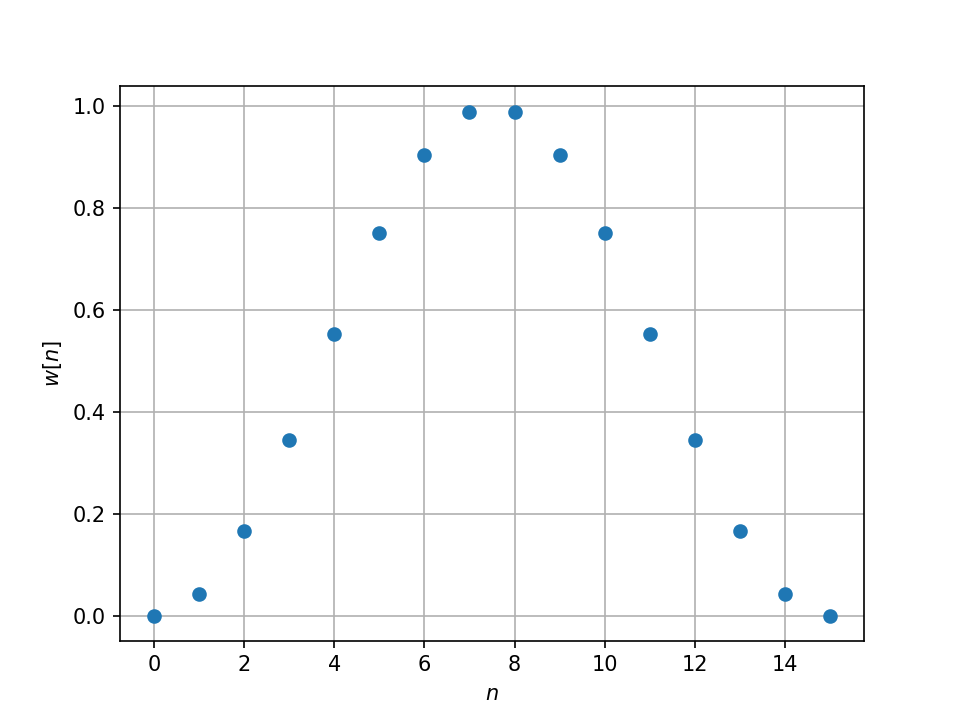

In [21]:
N = 16
h = np.hanning(N)
plt.figure()
plt.plot(range(N),h,'o')
plt.xlabel('$n$')
plt.ylabel('$w[n]$')
plt.grid()
plt.show()

### Triangular window
The triangular window
$$\begin{aligned}
                w[n]=
                \begin{cases}
                    \frac{n}{N/2} &\text{for } n=0,1,2,\ldots N/2 \\
                    2-\frac{n}{N/2} &\text{for } n= \frac{N}{2} +1, \frac{N}{2}+2,\ldots N -1
                \end{cases}     
            \end{aligned}
$$
for $N=17$

<IPython.core.display.Javascript object>


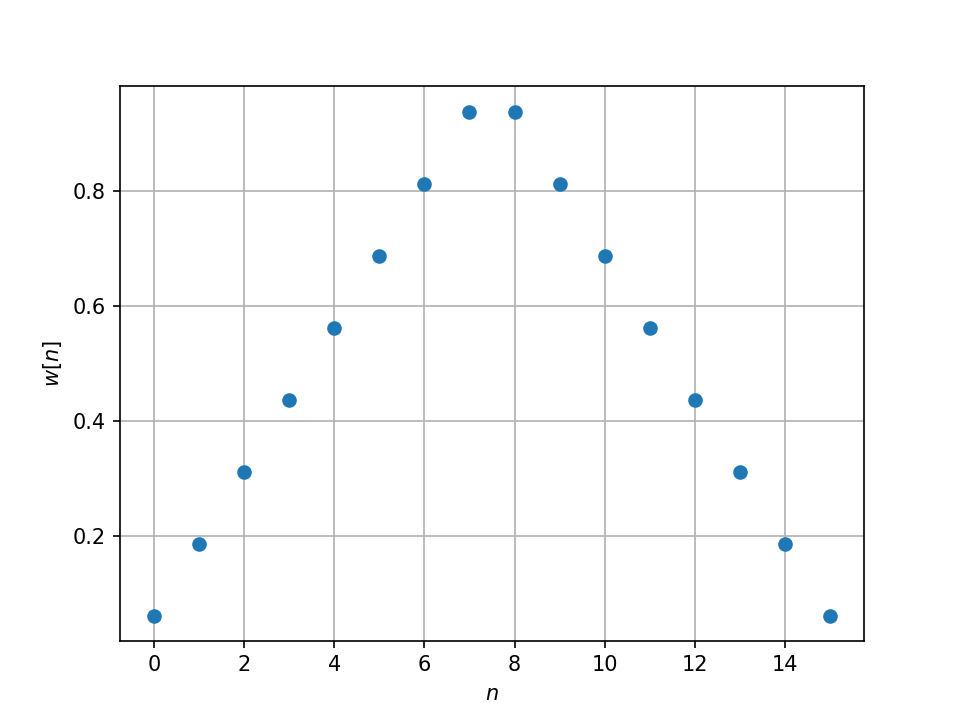

In [20]:
N=16
window = signal.triang(N)
plt.figure()
plt.plot(window,'o')
plt.xlabel('$n$')
plt.ylabel('$w[n]$')
plt.grid()
plt.show()